EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 2**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Completar`
  - `# Completar`
- Usuario de GitHub (opcional):  `# Completar`


## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 30 de mayo a las 20:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    2    |
| Pregunta 1.2                   |    2    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    5    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    2    |
| Pregunta 1.8                   |    3    |
| Pregunta 1.9                   |    3    |
| Pregunta 1.10                   |    5    |
| Pregunta 1.11                   |    5    |
| Pregunta 1.12                   |    5    |
| Pregunta 1.13                   |    3    |
| Pregunta 1.13                   |    5    |
| Pregunta 2.0                   |    1    |
| Pregunta 2.1                   |    1    |
| Pregunta 2.2                   |    1    |
| Pregunta 2.3                   |    3    |
| Pregunta 2.4                   |    5    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    3    |
| Pregunta 2.7                   |    3    |
| Pregunta 2.8                   |    5    |
| Pregunta 2.9                   |    7    |
| Pregunta 2.10                   |    4    |
| Pregunta 2.11                   |    3    |
| Pregunta 2.12                   |    1    |
| Pregunta 2.13                   |    2    |
| Pregunta 2.14                   |    3    |
| Pregunta 2.15                   |    2    |
| Pregunta 2.16                   |    3    |

Total: 100 pts.


# KMeans & PCA

La guerra comercial desatada levanta un montón de preguntas de interés en economía. Una de estas es: ¿Qué países sufrirán de forma similar las consecuencias de esta? ¿Quiénes serían ganadores? ¿Quienes serían perdedores?

En esta parte exploraremos el aporte que los métodos de Clustering de Machine Learning pueden hacer a la respuesta de esta cuestión. Nos enfocaremos en variables relacionadas al comercio exterior para determinar similitud entre grupos de países. Más específicamente, en variables relacionadas a las exportaciones.

Para esto, considere las siguientes variables que describen el perfil exportador de cada país:

- GDP growth (annual %)
- Agricultural raw materials exports (% of merchandise exports)
- Computer, communications and other services (% of commercial service exports)
- Exports of goods and services (% of GDP)
- Food exports (% of merchandise exports)
- Fuel exports (% of merchandise exports)
- High-technology exports (% of manufactured exports)
- ICT service exports (% of service exports, BoP)
- Insurance and financial services (% of service exports, BoP)
- International tourism, receipts (% of total exports)
- Manufactures exports (% of merchandise exports)
- Merchandise exports to high-income economies (% of total merchandise exports)
- Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)
- Ores and metals exports (% of merchandise exports)
- Taxes on exports (% of tax revenue)
- Transport services (% of commercial service exports)


La idea será determinar similitud entre países y las variables qué son más relevantes a la hora de determinarla.

Debido a que 2023 es el año reciente con una mayor riqueza de datos, y debido a que nos interesan cambios respecto al _status quo_ en el contexto actual, trabajaremos con datos sólo de aquel año.

Database Source: World bank & Trade Analysis Information System.



### Pregunta 2.0

Cargue la base de datos disponible en el siguiente link: https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.cs.

En el siguiente link podrá encontrar información adicional sobre el _dataset_ por si lo llega a necesitar: https://github.com/olherreragz/EAE3709-2025-1/blob/main/T2_data/Series_Metadata.csv.

Elimine las columnas `"Series Code"` y `"Country Code"`. Luego, transforme su _dataframe_ de formato _Long_ a _Wide_. Su _dataframe_ final deberá contener una columna que indique el nombre del país y columnas que indiquen la medida de exportación correspondiente:

`<Country>, <SeriesName1>, <SeriesName2> ....`



![Long to Wide Format](https://tavareshugo.github.io/r-intro-tidyverse-gapminder/fig/07-data_shapes.png)




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importamos el url
url = "https://raw.githubusercontent.com/olherreragz/EAE3709-2025-1/refs/heads/main/T2_data/Data.csv"
df = pd.read_csv(url)
df.head()

,Series Name,Series Code,Country Name,Country Code,2023 [YR2023]
0,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Afghanistan,AFG,2.71088679128353
1,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Albania,ALB,3.93662525742167
2,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Algeria,DZA,4.10000000000004
3,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,American Samoa,ASM,..
4,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,Andorra,AND,2.58355480961319


In [3]:
#Eliminamos las columnas
df.drop(columns=['Country Code', 'Series Code'], inplace=True)

In [4]:
df.describe()

,Series Name,Country Name,2023 [YR2023]
count,4256,4256,4256
unique,16,266,2835
top,GDP growth (annual %),Afghanistan,..
freq,266,16,1374


Como vemos, el "Series Name" puede tomar 16 valores distintos. Lo debemos pasar a formato Wide, teniendo una columna para cada uno de ellos, tomando el valor que aparece en 2023 [YR2023]

In [5]:
# Transformamos de long a wide
df = df.pivot(index="Country Name", columns="Series Name", values="2023 [YR2023]")

In [6]:
# Dejamos una columna de índice para tener disponible la de Pais.
df.reset_index(inplace=True)

In [7]:
df.head()

Series Name,Country Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
0,Afghanistan,..,..,16.7751362822863,..,..,2.71088679128353,..,..,..,..,..,12.8798269363707,9.68241869729934,..,..,..
1,Africa Eastern and Southern,1.93287526195653,35.9298385263195,24.3483372544611,14.285851632509,25.4254224001233,2.32013780158925,5.80516538196113,6.10657347896149,6.08028700896879,..,29.1304853698777,44.3959450802976,0.471789673271105,23.4925994471713,..,22.9754549072797
2,Africa Western and Central,3.80482687815641,23.7057568350145,..,12.9874441377748,61.3705691120184,3.3547328190002,..,5.69176863421842,14.9934752391386,..,6.76897203140647,54.1428772898838,3.17153807284374,4.3390849886261,..,36.2200117483328
3,Albania,0.406032063201426,24.4301090197124,38.6650817896799,11.9640780632637,6.34538423879421,3.93662525742167,0.682326849473647,3.01397608748124,0.662505307988438,..,56.6139655531231,77.7081307571647,19.5159727248964,5.34944752843742,..,10.9287529629646
4,Algeria,..,59.1626427564765,23.6195363708424,..,..,4.10000000000004,..,2.21311390791552,10.2830758414755,..,..,80.1800299622258,6.36723723188521,..,..,25.4709095419937


### Pregunta 2.1

Debido a que la pregunta de interés es sobre identificación de grupos de países, elime filas donde `Country Name` sea igual a cualquiera de los siguientes valores:

- "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World"




In [8]:
elim_list = """ - "Africa Eastern and Southern"  
- "Africa Western and Central"  
- "Arab World"  
- "Caribbean small states"  
- "Central Europe and the Baltics"  
- "Early-demographic dividend"  
- "East Asia & Pacific"  
- "East Asia & Pacific (IDA & IBRD countries)"  
- "East Asia & Pacific (excluding high income)"  
- "Euro area"  
- "Europe & Central Asia"  
- "Europe & Central Asia (IDA & IBRD countries)"  
- "Europe & Central Asia (excluding high income)"  
- "European Union"  
- "Fragile and conflict affected situations"  
- "Heavily indebted poor countries (HIPC)"  
- "High income"  
- "IBRD only"  
- "IDA & IBRD total"  
- "IDA blend"  
- "IDA only"  
- "IDA total"  
- "Late-demographic dividend"  
- "Latin America & Caribbean"  
- "Latin America & Caribbean (excluding high income)"  
- "Latin America & the Caribbean (IDA & IBRD countries)"  
- "Least developed countries: UN classification"  
- "Low & middle income"  
- "Low income"  
- "Lower middle income"  
- "Middle East & North Africa"  
- "Middle East & North Africa (IDA & IBRD countries)"  
- "Middle East & North Africa (excluding high income)"  
- "Middle income"  
- "North America"  
- "Not classified"  
- "OECD members"  
- "Other small states"  
- "Pacific island small states"  
- "Post-demographic dividend"  
- "Pre-demographic dividend"  
- "Small states"  
- "South Asia"  
- "South Asia (IDA & IBRD)"  
- "Sub-Saharan Africa"  
- "Sub-Saharan Africa (IDA & IBRD countries)"  
- "Sub-Saharan Africa (excluding high income)"  
- "Upper middle income"  
- "World" """


In [9]:
# for entry in elim_list: Primero separa a cada país eliminando \n
# Luego, remueve '-' y despues las """", solo si hay algo (if entry).

elim_list = [entry.strip('- ').strip('"') for entry in elim_list.split("\n") if entry]

In [10]:
# En vez de eliminarlas para siempre, lo mantendremos en otro Dataframe
# Con esta información llenaremos NAs faltantes del DF con mayor facilidad.
keep_list = ["Africa Eastern and Southern", "Africa Western and Central", "Arab World", 
             "Caribbean small states", "Central Europe and the Baltics", "East Asia & Pacific",
            "Europe & Central Asia", "European Union", "Latin America & Caribbean", "Middle East & North Africa",
            "North America", "Pacific island small states", "South Asia", "Sub-Saharan Africa"]
df_regions = df[df["Country Name"].isin(keep_list)]

In [11]:
# eliminamos las columnas
df = df[~df["Country Name"].isin(elim_list)]

### Pregunta 2.2

Reemplace todos los valores `".."` por `NA`. Luego, transforme las columnas a variables numéricas y despliegue estadísticas descriptivas.


In [12]:
df = df.replace("..", np.nan)

In [13]:
df[df.columns[1:]] = df[df.columns[1:]].apply(pd.to_numeric, errors="coerce")

In [14]:
df.describe()

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670


In [15]:
summary = df.describe().T 
summary['median'] = df.median(numeric_only=True)
summary.T

Series Name,Agricultural raw materials exports (% of merchandise exports),Computer; communications and other services (% of commercial service exports),Exports of goods and services (% of GDP),Food exports (% of merchandise exports),Fuel exports (% of merchandise exports),GDP growth (annual %),High-technology exports (% of manufactured exports),ICT service exports (% of service exports; BoP),Insurance and financial services (% of service exports; BoP),International tourism; receipts (% of total exports),Manufactures exports (% of merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Ores and metals exports (% of merchandise exports),Taxes on exports (% of tax revenue),Transport services (% of commercial service exports)
count,149.000000,161.000000,158.000000,149.000000,145.000000,195.000000,147.000000,157.000000,152.000000,0.0,149.000000,205.000000,192.000000,149.000000,22.000000,161.000000
mean,2.726255,35.005284,45.398868,24.136526,14.275881,3.241160,11.352849,10.234009,5.732781,NaN,42.098438,60.914241,5.096570,9.476862,2.624425,20.583359
std,7.416283,23.550764,33.331007,23.862474,23.215387,6.641153,13.507894,11.534976,7.703914,NaN,29.236666,24.978469,11.628976,15.470820,4.899022,16.870115
min,0.000000,0.935706,1.108109,0.079874,0.000000,-20.111576,0.000000,0.043145,0.008135,NaN,0.210353,0.121224,0.000034,0.000000,0.000002,0.663447
25%,0.343928,13.309551,23.637110,8.338115,0.498740,1.168088,2.226174,2.681207,1.319000,NaN,15.347126,43.902677,0.244645,1.353868,0.046153,7.784412
50%,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129
75%,2.120083,53.862266,56.494967,32.790842,15.770449,4.987486,16.841983,12.745838,7.163361,NaN,68.665103,82.370504,3.269713,8.391231,1.419763,27.632283
max,63.703068,95.860793,212.530618,98.210416,95.516439,75.061377,72.315489,61.766896,55.672826,NaN,94.990393,97.770966,96.949670,76.471800,15.578989,86.950670
median,0.794963,32.273353,38.790357,15.056512,4.097826,2.960181,6.030929,7.285006,3.203366,NaN,37.251121,65.682415,0.942470,3.138350,0.232860,15.739129


In [16]:
# Repetimos para el DF de regiones
df_regions = df_regions.replace("..", np.nan)
df_regions[df_regions.columns[1:]] = df_regions[df_regions.columns[1:]].apply(pd.to_numeric, errors="coerce")

### Pregunta 2.3

Grafique la distribución empírica de todas las variables numéricas del dataset. Comente sobre cada una de ellas.

In [17]:
columnas = df.select_dtypes(include=['number']).columns
len(columnas)

16

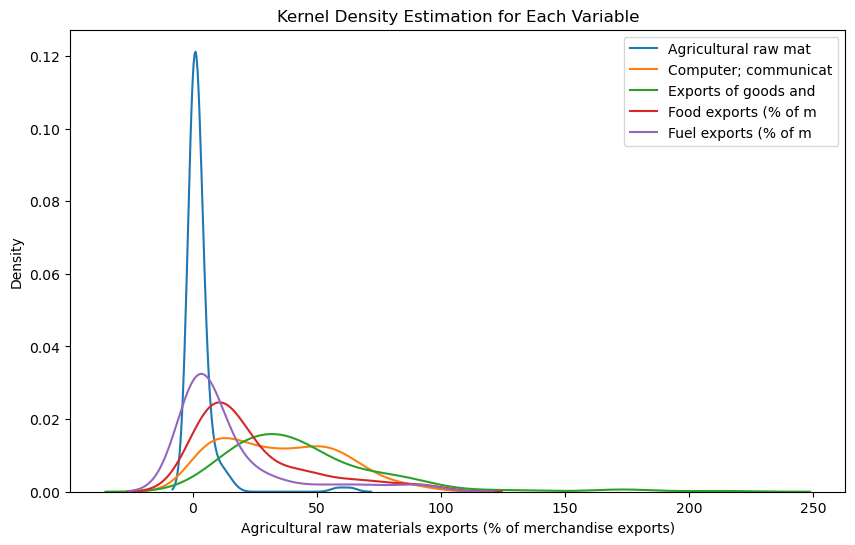

In [18]:
plt.figure(figsize=(10, 6))
for column in columnas[0:5]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Kernel Density Estimation for Each Variable")
plt.show()

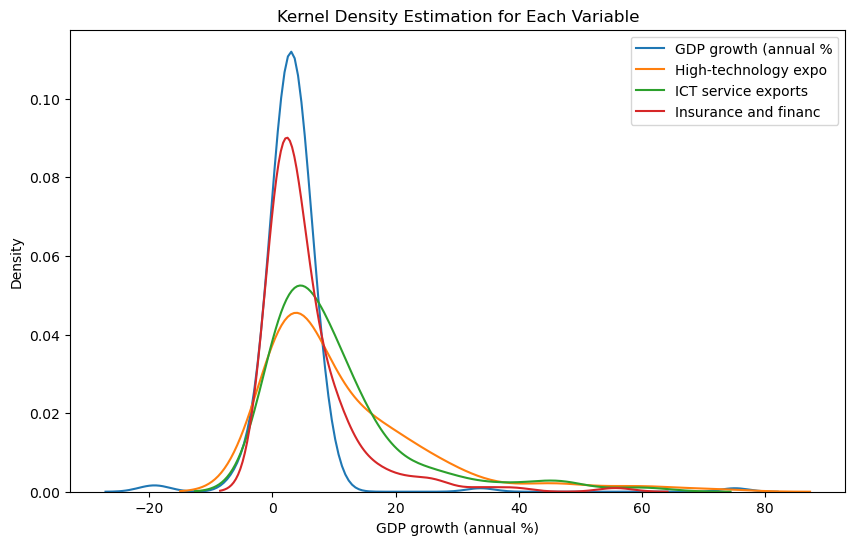

In [19]:
plt.figure(figsize=(10, 6))
for column in columnas[5:10]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Kernel Density Estimation for Each Variable")
plt.show()

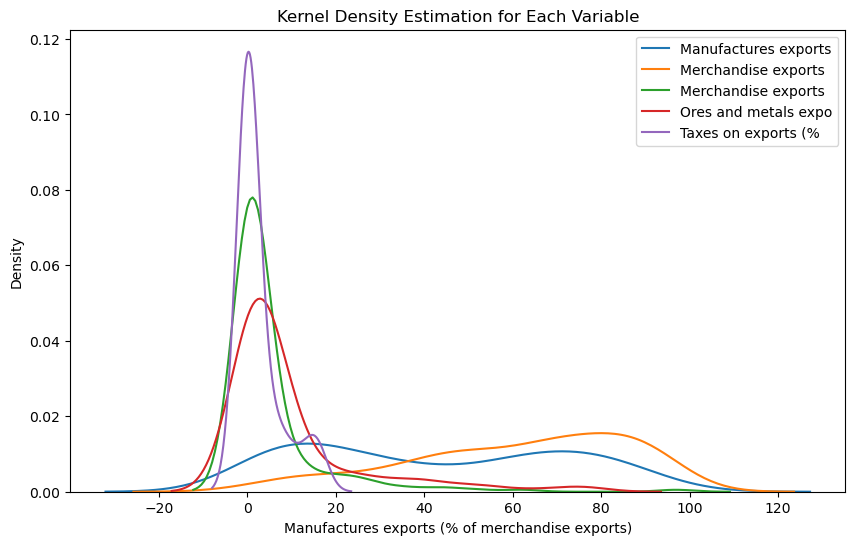

In [20]:
plt.figure(figsize=(10, 6))
for column in columnas[10:15]:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Kernel Density Estimation for Each Variable")
plt.show()

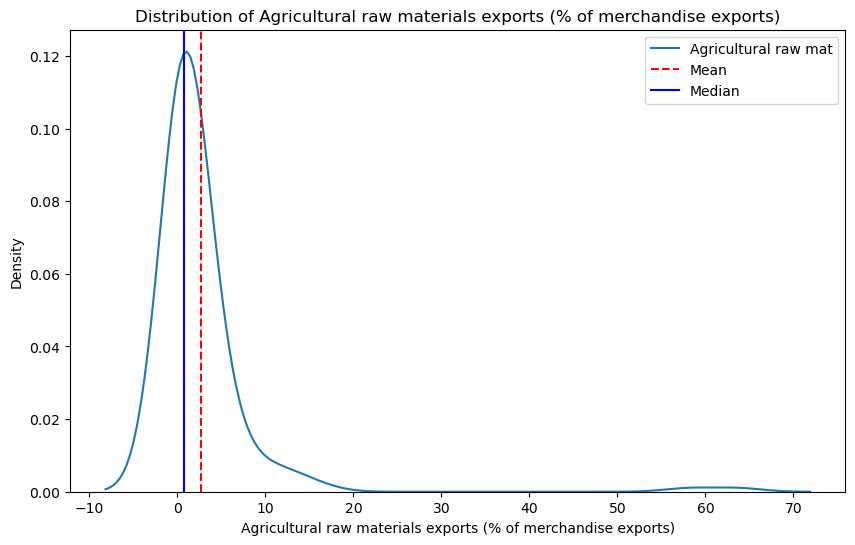

In [21]:
plt.figure(figsize=(10, 6))

column = "Agricultural raw materials exports (% of merchandise exports)"
sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

# Calculate mean and median
mean_value = df[column].mean()
median_value = df[column].median()

# Overlay mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='blue', linestyle='-', label='Median')

# Add legend and title
plt.legend()
plt.title(f'Distribution of {column}')

plt.show()




---


*Escriba* su respuesta en esta celda...


---


## Missing Values

### Pregunta 2.4

Realice análisis de valores vacíos y tratamiento de estos. Se premiará mantener el mayor número de observaciones posibles bajo criterios razonables. Luego de esta pregunta no deben quedar nulos en el _dataframe_ a utilizar.


In [22]:
df.drop(columns="International tourism; receipts (% of total exports)", inplace=True)

In [23]:
df_regions.drop(columns="International tourism; receipts (% of total exports)", inplace=True)

In [24]:
df.columns

Index(['Country Name',
       'Agricultural raw materials exports (% of merchandise exports)',
       'Computer; communications and other services (% of commercial service exports)',
       'Exports of goods and services (% of GDP)',
       'Food exports (% of merchandise exports)',
       'Fuel exports (% of merchandise exports)', 'GDP growth (annual %)',
       'High-technology exports (% of manufactured exports)',
       'ICT service exports (% of service exports; BoP)',
       'Insurance and financial services (% of service exports; BoP)',
       'Manufactures exports (% of merchandise exports)',
       'Merchandise exports to high-income economies (% of total merchandise exports)',
       'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)',
       'Ores and metals exports (% of merchandise exports)',
       'Taxes on exports (% of tax revenue)',
       'Transport services (% of commercial service exports)'],
      dty

In [25]:
low_variance_vars = ['Agricultural raw materials exports (% of merchandise exports)', 'GDP growth (annual %)', 
                    'Insurance and financial services (% of service exports; BoP)', 
                    'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)']
# 'Taxes on exports (% of tax revenue)' ?

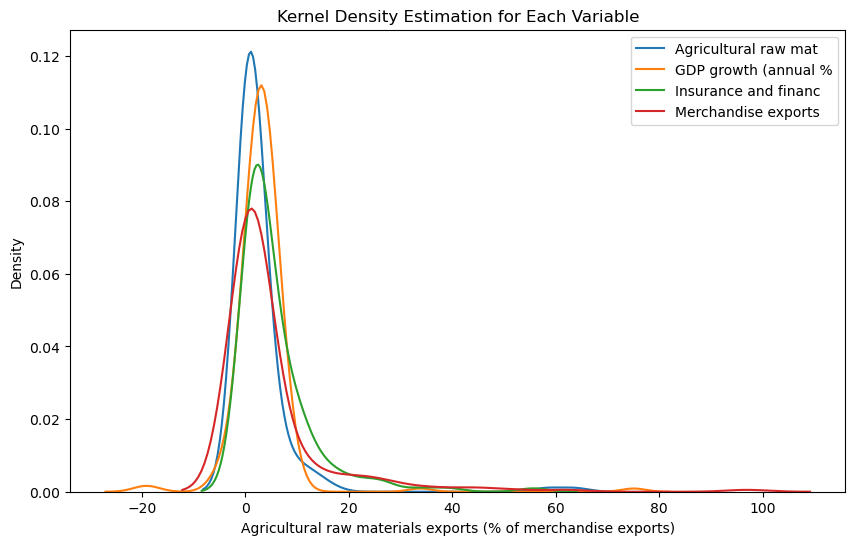

In [26]:
plt.figure(figsize=(10, 6))
for column in low_variance_vars:
    sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

plt.legend()
plt.title("Kernel Density Estimation for Each Variable")
plt.show()

In [27]:
for var in low_variance_vars:
    median_var = df[var].median()
    df[var] = df[var].fillna(median_var)

In [28]:
missing_counts = df.isna().sum()
print(missing_counts)

Series Name
Country Name                                                                                                           0
Agricultural raw materials exports (% of merchandise exports)                                                          0
Computer; communications and other services (% of commercial service exports)                                         56
Exports of goods and services (% of GDP)                                                                              59
Food exports (% of merchandise exports)                                                                               68
Fuel exports (% of merchandise exports)                                                                               72
GDP growth (annual %)                                                                                                  0
High-technology exports (% of manufactured exports)                                                                   70
ICT service exports 

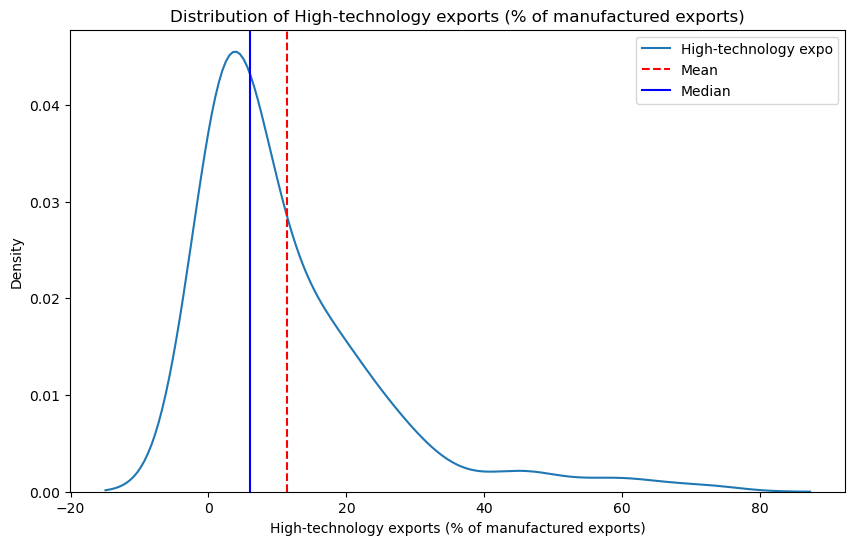

In [29]:
plt.figure(figsize=(10, 6))

column = 'High-technology exports (% of manufactured exports)'
sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

# Calculate mean and median
mean_value = df[column].mean()
median_value = df[column].median()

# Overlay mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='blue', linestyle='-', label='Median')

# Add legend and title
plt.legend()
plt.title(f'Distribution of {column}')

plt.show()

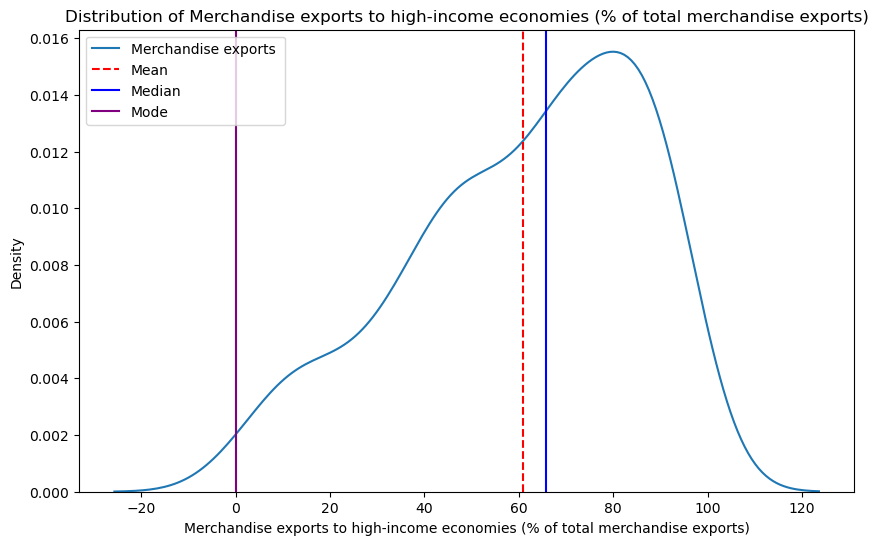

In [30]:
plt.figure(figsize=(10, 6))

column = 'Merchandise exports to high-income economies (% of total merchandise exports)'
sns.kdeplot(df[column].dropna(), label=f'{column[:20]}')

# Calculate mean and median
mean_value = df[column].mean()
median_value = df[column].median()
mode_value = df[column].mode()[0]

# Overlay mean and median
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(median_value, color='blue', linestyle='-', label='Median')
plt.axvline(mode_value, color='purple', linestyle='-', label='Mode')

# Add legend and title
plt.legend()
plt.title(f'Distribution of {column}')

plt.show()

In [31]:
import geopandas as gpd

# Load GeoJSON file containing country boundaries
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Create an empty dictionary for neighboring countries
neighbor_dict = {}

# Find neighbors by checking shared borders
for index, country in world.iterrows():
    country_name = country['ADMIN']  # Adjust column name based on dataset
    neighbors = world[world.touches(country.geometry)]['ADMIN'].tolist()
    neighbor_dict[country_name] = neighbors

# Print the dictionary of neighboring countries
print(neighbor_dict)

ModuleNotFoundError: No module named 'geopandas'

## Outliers

### Pregunta 2.5

Realice análisis de datos _outliers_. De ser necesario aplique un procesamiento de outliers, de no ser necesario justifique.

Se premiará el buen criterio fundamentado.




---


*Escriba* su respuesta en esta celda...


---


## Feature Engineering


Cree un _pipeline_ de preprocesamiento con las siguientes transformaciones a las columnas correspondientes:

*   **Columnas Numéricas** : Aplique un `StandardScaler` para estandarizar estas variables.
*   **Columnas Categóricas No Binarias** : Aplique `OneHotEncoder` para crear variables dummy. Asegúrese de manejar posibles categorías desconocidas durante la transformación.
*   **Columnas a Eliminar** : Elimine columnas que dejan de ser relavantes luego de las trasformaciones.
*  **Columnas Dummies MultiNivel** : cree columnas dummies para las variables multi categoricas (tomando codificadas a 0s y 1s =, para su respctiva categoria)
*  **Columnas Label Encoding MultiNivel** : Dentro de las columnas multinivel hay 2 columnas que presentan un orden natural. e.g. en la columna 'month' tenemos que 'jan' < 'feb' < 'dec'. Aplique en la columna 'month' y otra columna que deberá determinar usted un label encoder que capture ese ordenamiento natural, luego normalice con un minmax scaler para que las columnas varien entre 0 y 1.


Una vez creado el pipeline, aplíquelo a su conjunto de features (`X`). Muestre la forma (_shape_) del dataset original y del dataset procesado para verificar los cambios. ¿Cuántas nuevas columnas hay?

Adicionalmente, elimine del análisis la variable `day_of_week`. Si considera necesario realizar transformaciones adicionales a las variables, realicelas en este punto.

### Pregunta 2.6

Realice _feature engineering_ de las variables numéricas (para luego entrenar un modelo _K-Means_ con estas). Realice los ajustes que estime conveniente, pero su tratamiento debe incluir por lo menos estandarización de las variables.

Más adelante se le pedirá comentar sobre los resultados de sus modelos, por lo que considere que sus decisiones podrían condicionar futuras preguntas.



## K-Means

### Pregunta 2.7

Considerando el dataframe completo (todas sus columnas atributos), determine el número óptimo de clusters mediante el "Elbow method". Considere un rango $k \in [1, 30]$. Describa el comportamiento observado de la curva.






---


*Escriba* su respuesta en esta celda...


---


### Pregunta 2.8

Un problema habitual del modelo _K-Means_ es que pierde desempeño a mayor dimensionalidad.

En esta pregunta defina **por lo menos 5 combinaciones de columnas** (mínimo 2 columnas y máximo 4). Para cada combinación determine el número óptimo de clusters mediante el "Elbow method" considerando $k \in [1, 30]$.

Un posible enfoque para lo anterior es tomar un _approach_ estadístico y escoger variables que empíricamente muestran mayores indicios de poder diferenciador entre las observaciones. De todas formas, recuerde que la pregunta de interés es "¿qué países se verán expuestos de forma similar a la guerra comercial?". En este sentido, es altamente recomendable escoger variables con una mayor relación al fenómeno de la guerra comercial, ya que puede ser útil para discernir de qué forma podría verse expuesto cada grupo.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.9

Escoja la combinación de columnas que considera adecuada emplear, refiriéndose tanto al comportamiento observado de la curva, como al nivel de la métrica empleada al que se alcanza la convergencia.

Estime el modelo con $k$ óptimo y las columnas escogidas. Visualice los grupos graficando _scatterplots_. Considere gráficos en 3 dimensiones si su modelo posee 3 o más variables.

Describa en qué se diferencian los grupos encontrados y de qué manera le podría afectar la guerra comercial a cada uno. Liste una pequeña muestra representativa de los países que contiene cada grupo.


---


*Escriba* su respuesta en esta celda...


---

## PCA

_PCA_ es una técnica de reducción de dimensionalidad que nos permite trabajar sobre un set de componentes principales ortogonales (mayor facilidad para los modelos a la hora de detectar patrones), además de permitirnos visualizar espacios multidimensionales, quedándonos sobre el espacio de PCA.



### Pregunta 2.10

Utilizando todas las variables originales y $k$ óptimo escogido en la pregunta anterior, estime un PCA con 2 componentes principales. Luego, estime un modelo _K-Means_ sobre los componentes principales obtenidos. Grafique las observaciones en un _scatterplot_ de 2 dimensiones. Coloree los puntos usando los label de los clusters obtenidos.

¿Cuáles son las principales diferencias entre los grupos? Encuentre las variables más definitivas a la hora de agrupar países con los 2 primeros componentes principales.


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.11


Repita lo anterior  (descripción incluida), pero con 3 componentes principales y un _scatterplot_ en 3 dimensiones.

---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.12

Otro de los usos de los más comúnes de _PCA_, además de _feature engineering_, es la visualización. En esta sección utilizaremos _PCA_ para confirmar visualmente que estamos clusterizando países similares.

Usando el diccionario en la celda de abajo agrega una columna de continente al _dataframe_ de trabajo.

In [ ]:
country_continent_mapping = {
    'Albania': 'Europe',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Aruba': 'North America', # Usually classified with the Caribbean
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahrain': 'Asia',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Cabo Verde': 'Africa',
    'Canada': 'North America',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Congo Dem. Rep.': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa', # Transcontinental, but usually Africa
    'El Salvador': 'North America',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Hong Kong': 'Asia',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia', # Transcontinental, mostly Asia
    'Kenya': 'Africa',
    'Korea Rep.': 'Asia',
    'Latvia': 'Europe',
    'Lesotho': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Macao': 'Asia',
    'Malaysia': 'Asia',
    'Malta': 'Europe',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Moldova': 'Europe',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Namibia': 'Africa',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Pakistan': 'Asia',
    'Panama': 'North America',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Samoa': 'Oceania',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe',
    'Slovenia': 'Europe',
    'South Africa': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Tunisia': 'Africa',
    'Turkiye': 'Asia', # Transcontinental, mostly Asia
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Zambia': 'Africa'
}


### Pregunta 2.13

Realice un PCA de 2 componentes principales, grafique un _scatterplot_ del resultado y coloree cada punto según su continente. ¿Que se obserba?


---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.14

Genera el mismo gráfico anterior, pero ahora coloree los puntos del scatterplot usando los clusters de un KMeans de 3 clústers y `random_state=42`. Describa los clusters según el gráfico.



---


*Escriba* su respuesta en esta celda...


---

### Pregunta 2.15

¿Cual es la proporcion de cada cluster por continente?


### Pregunta 2.16

¿Cuál es la característica numérica más alta en magnitud por cluster (usando sus centroides)? ¿Cuál es su signo? ¿Como nos ayuda a interpretar los clusters? ¿Que podemos concluir de cada uno de estos clusters en contexto de la guerra comercial?


---


*Escriba* su respuesta en esta celda...


---